In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import datetime as dt 
from datetime import timedelta
today = dt.datetime.today()
yesterday = today - timedelta(days = 1)

In [17]:
df = web.DataReader('ITC.NS', data_source='yahoo',start='2012-08-30',end=today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-08-30,182.166672,177.399994,179.266663,180.399994,23958967.0,139.346252
2012-08-31,180.333328,177.533340,180.000000,178.433334,7843771.0,137.827164
2012-09-03,179.899994,177.566666,179.333328,178.399994,5977234.0,137.801422
2012-09-04,179.233337,177.100006,178.066666,177.666672,3900220.0,137.234955
2012-09-05,179.533340,177.333328,177.333328,178.500000,6393093.0,137.878647
...,...,...,...,...,...,...
2022-09-05,329.600006,323.750000,325.000000,328.850006,17471906.0,328.850006
2022-09-06,330.000000,326.399994,330.000000,327.149994,11970750.0,327.149994
2022-09-07,328.299988,325.250000,326.000000,326.100006,8085824.0,326.100006


In [18]:
df.shape

(2471, 6)

In [19]:
df = pd.DataFrame.dropna(df)

In [20]:
df.shape

(2471, 6)

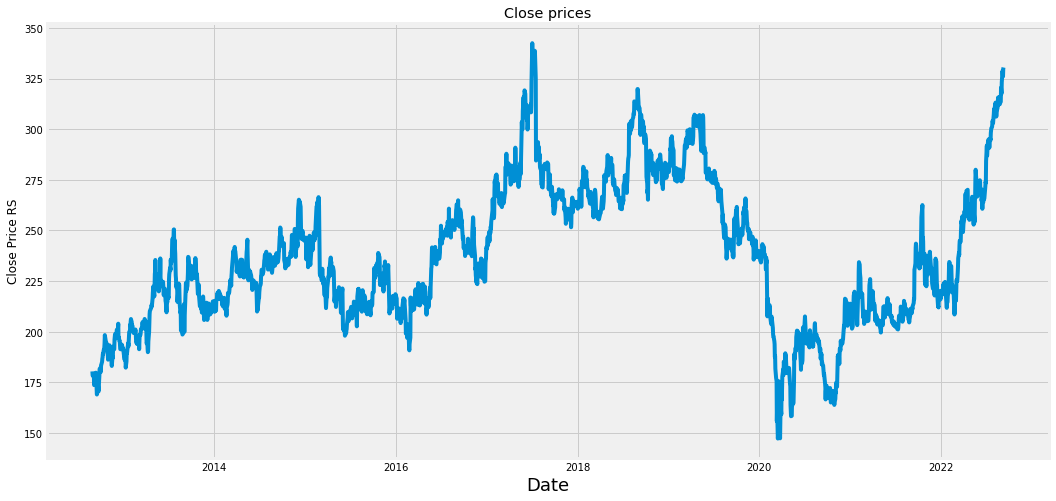

In [21]:
plt.figure(figsize=(16,8))
plt.title('Close prices')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price RS')
plt.show()

In [22]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1977

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[-1.61642835],
       [-1.67247601],
       [-1.67342617],
       ...,
       [ 2.53586327],
       [ 2.64415879],
       [ 2.66125831]])

In [24]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([-1.61642835, -1.67247601, -1.67342617, -1.69432506, -1.67057611,
       -1.80927087, -1.76557233, -1.72947383, -1.67912587, -1.64112703,
       -1.63447761, -1.66107662, -1.94131576, -1.92801647, -1.88526811,
       -1.78742182, -1.8966675 , -1.802621  , -1.74562318, -1.68577573,
       -1.58222931, -1.56607996, -1.62307778, -1.52713139, -1.52048196,
       -1.48058323, -1.43688513, -1.41883588, -1.37133755, -1.37133755,
       -1.30958976, -1.31528989, -1.28109085, -1.2174436 , -1.10534786,
       -1.17184517, -1.24784241, -1.20889384, -1.28109085, -1.35993816,
       -1.3893868 , -1.45113458, -1.37703724, -1.27349126, -1.26399177,
       -1.24879215, -1.2668414 , -1.28299075, -1.36563785, -1.50528234,
       -1.53948095, -1.40553615, -1.4273852 , -1.32193932, -1.2668414 ,
       -1.31243983, -1.30294034, -1.16709521, -1.09584793, -1.08634844])]
[-1.1309967059156552]

[array([-1.61642835, -1.67247601, -1.67342617, -1.69432506, -1.67057611,
       -1.80927087, -1.76557233, -1.7

In [25]:
x_train,y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1917, 60)

In [26]:
x_train.shape[0],x_train.shape[1]

(1917, 60)

In [27]:
sample=float(x_train.shape[0])

In [28]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1917, 60, 1)

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [31]:
model.fit(x_train,y_train, batch_size=1, epochs = 1)

1917/1917 [==============================] - 37s 18ms/step - loss: 0.0359


In [32]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [33]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [34]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


16/16 [==============================] - 1s 13ms/step


In [35]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.0073202650556680165

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19904\3657149577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


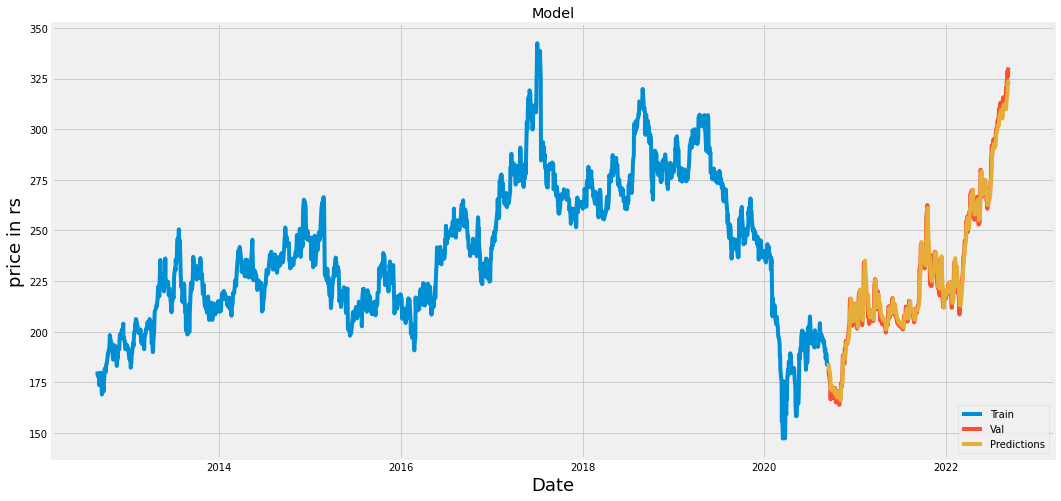

In [36]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('price in rs',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [37]:
valid

,Close,Predictions
Date,,
2020-09-15,181.800003,184.557709
2020-09-16,180.649994,183.627167
2020-09-17,178.600006,182.548386
2020-09-18,179.100006,181.065262
2020-09-21,175.750000,180.242966
...,...,...
2022-09-05,328.850006,317.928986
2022-09-06,327.149994,322.325012
2022-09-07,326.100006,323.660522
